In [17]:
#%% Instalando os pacotes

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install scipy
# !pip install scikit-learn
# !pip install pingouin

#%% Importando os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
# pio.renderers.default='browser'
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score

In [81]:
#%% Importando o banco de dados

dados_paises = pd.read_csv('dados_paises.csv')
## Fonte: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

#%% Visualizando informações sobre os dados e variáveis

# Estatísticas descritivas das variáveis

display(dados_paises.head(10))

tab_desc = dados_paises.describe()

display(tab_desc)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [3]:
# Matriz de correlações das variáveis

# Vamos remover a coluna "country", pois é apenas um id
paises = dados_paises.drop(columns=['country'])

# Gerando a matriz de correlações de Pearson
matriz_corr = pg.rcorr(paises, method = 'pearson', upper = 'pval', 
                       decimals = 4, 
                       pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

display(matriz_corr)
#%% Mapa de calor indicando a correlação entre os atributos

# Matriz de correlações básica
corr = paises.corr()

display(corr)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,-,***,***,,***,***,***,***,***
exports,-0.3181,-,,***,***,,***,***,***
health,-0.2004,-0.1144,-,,*,***,***,**,***
imports,-0.1272,0.7374,0.0957,-,,***,,**,
income,-0.5243,0.5168,0.1296,0.1224,-,*,***,***,***
inflation,0.2883,-0.1073,-0.2554,-0.247,-0.1478,-,***,***,***
life_expec,-0.8867,0.3163,0.2107,0.0544,0.612,-0.2397,-,***,***
total_fer,0.8485,-0.32,-0.1967,-0.159,-0.5018,0.3169,-0.7609,-,***
gdpp,-0.483,0.4187,0.346,0.1155,0.8956,-0.2216,0.6001,-0.4549,-


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [82]:
# Gráfico de calor (heatmap)
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}',
        colorscale='Greens'))

fig.update_layout(
    height = 600,
    width = 800)

fig.show()

In [6]:
#%% Padronização das variáveis

# Aplicando o procedimento de ZScore em todas as variáveis
paises_pad = paises.apply(zscore, ddof=1)

# As variáveis passam a ter média = 0 e desvio padrão = 1

#%% Cluster hierárquico aglomerativo: distância euclidiana + single linkage

# Visualizando as distâncias
dist_euclidiana = pdist(paises_pad, metric='euclidean')

print(dist_euclidiana)

# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

[4.13092195 3.88586508 2.99065182 ... 3.4306949  4.35369694 2.16645141]


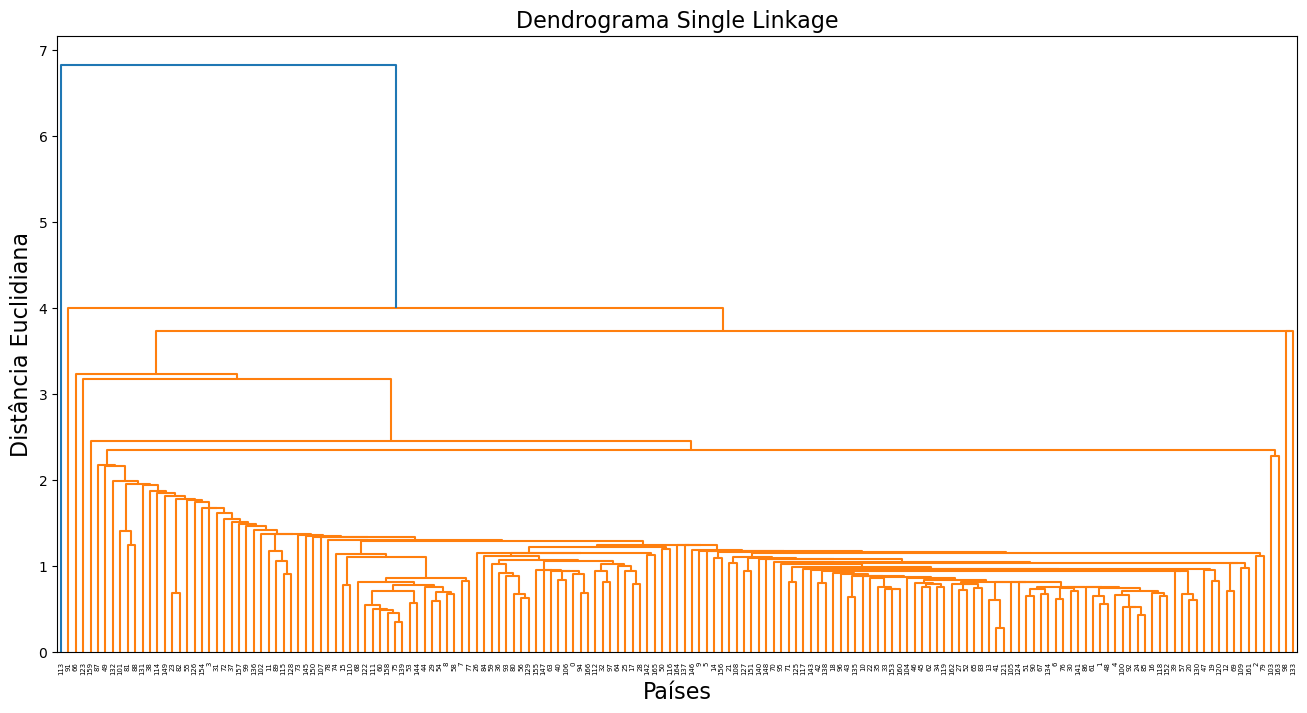

In [7]:
# Gerando o dendrograma
## Distância euclidiana e método de encadeamento single linkage

plt.figure(figsize=(16,8))
dend_sing = sch.linkage(paises_pad, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing)
plt.title('Dendrograma Single Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average

# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

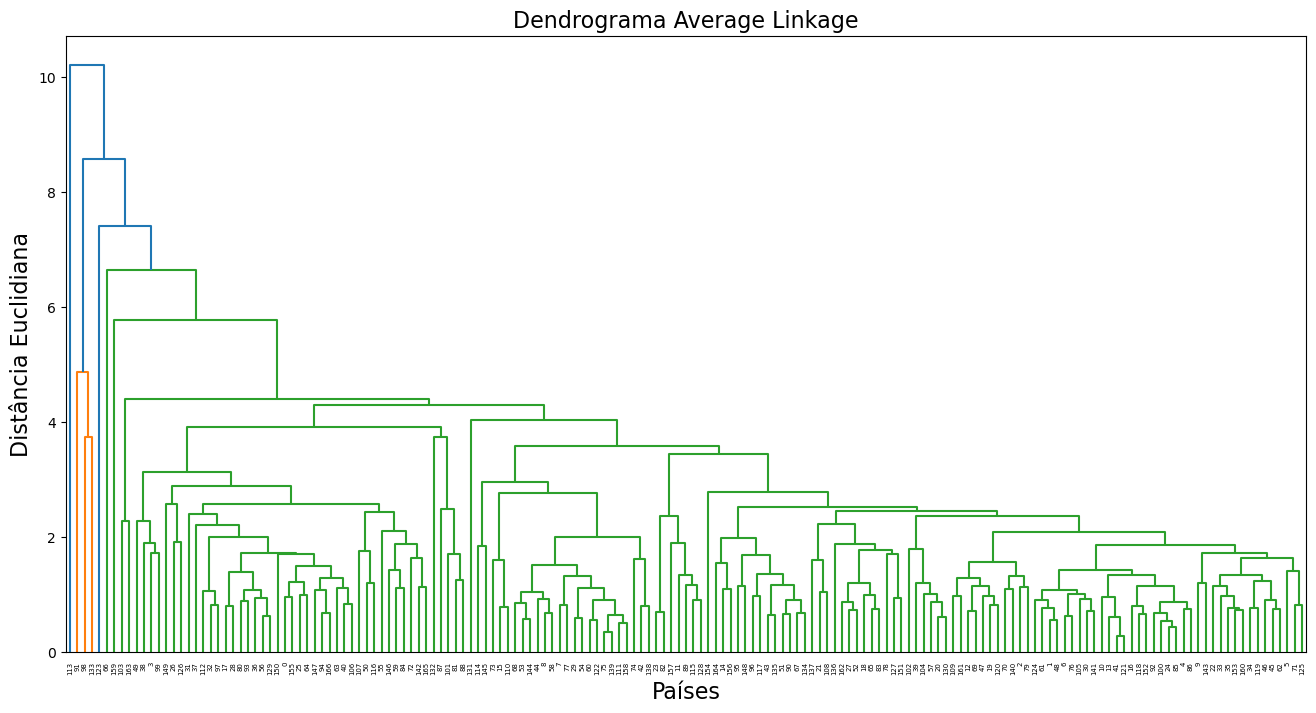

In [8]:
#%% Cluster hierárquico aglomerativo: distância euclidiana + average linkage

# Gerando o dendrograma
## Distância euclidiana e método de encadeamento average linkage

plt.figure(figsize=(16,8))
dend_avg = sch.linkage(paises_pad, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg)
plt.title('Dendrograma Average Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

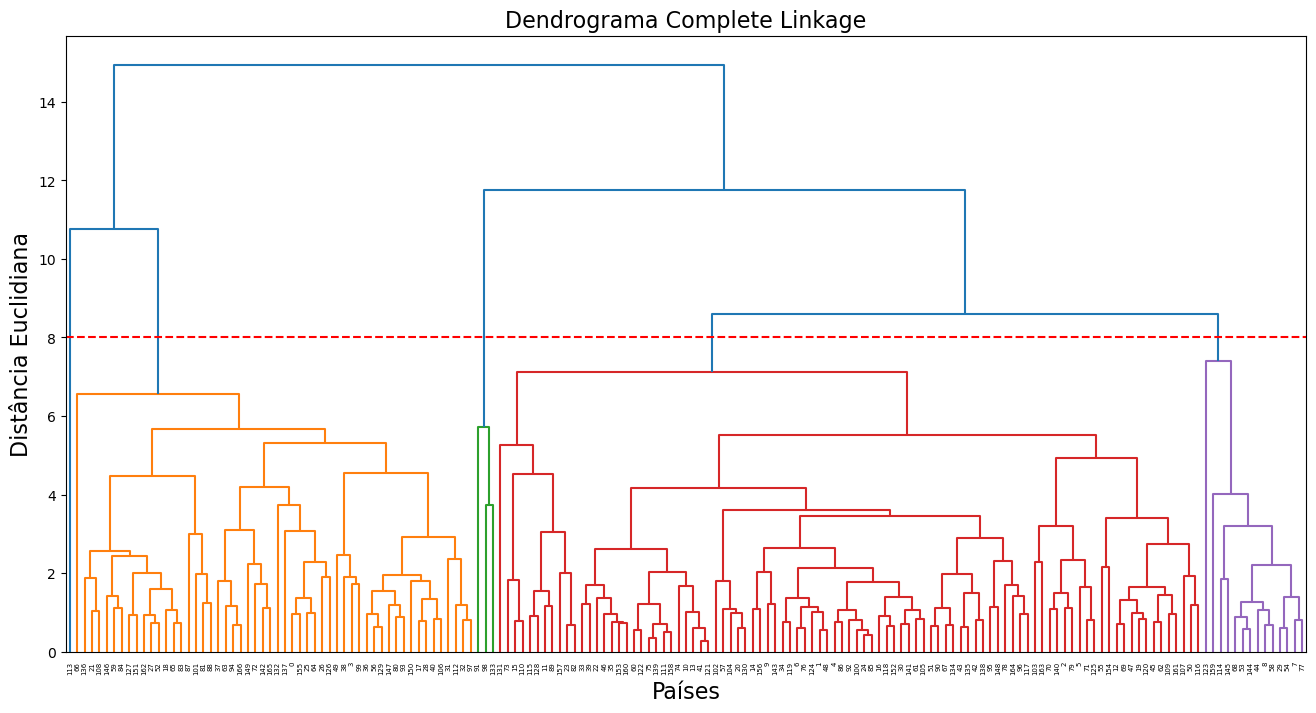

In [9]:
# Gerando o dendrograma
## Distância euclidiana e método de encadeamento complete linkage

plt.figure(figsize=(16,8))
dend_compl = sch.linkage(paises_pad, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 8)
plt.title('Dendrograma Complete Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 8, color = 'red', linestyle = '--')
plt.show()

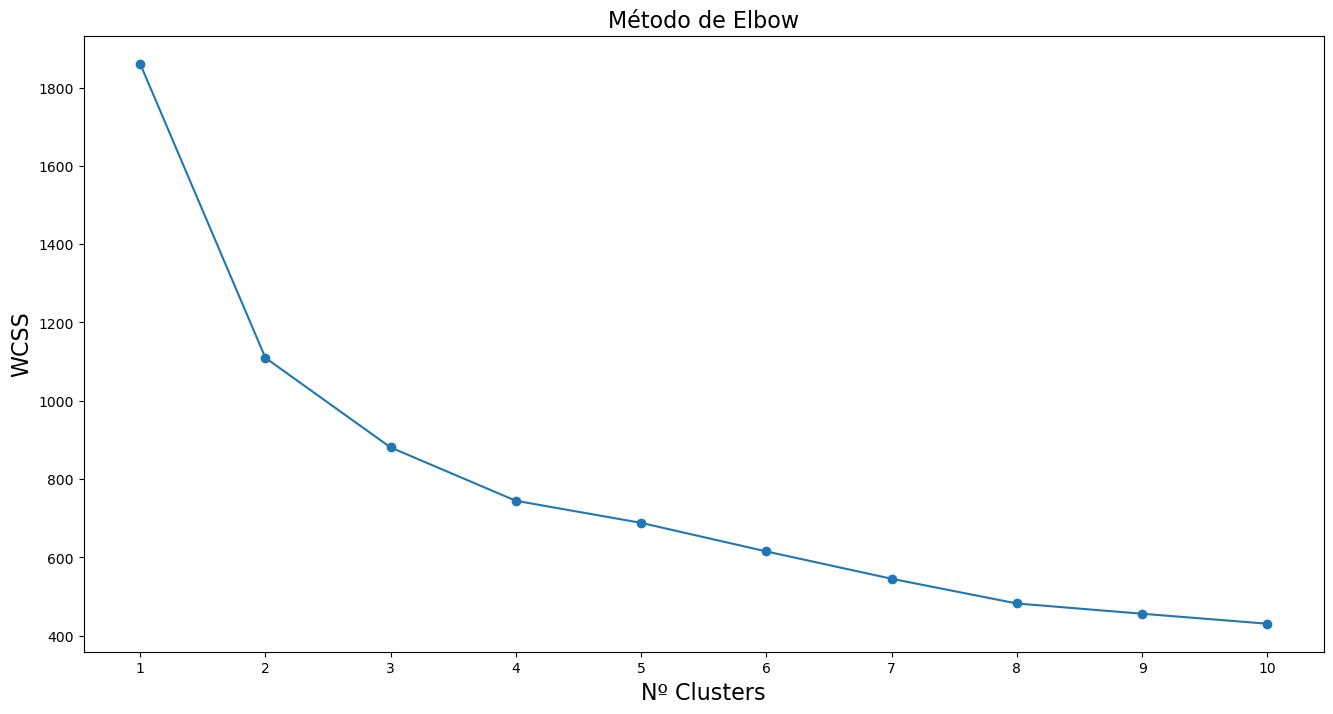

In [15]:
#%% Identificação da quantidade de clusters (Método Elbow)

elbow = []
K = range(1,11) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(paises_pad)
    elbow.append(kmeanElbow.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11)) # ajustar range
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

Método Elbow na Definição de Quantidade de Clusters
O método Elbow (cotovelo) é uma técnica usada para determinar o número ideal de clusters em uma análise de agrupamento (clustering). Ele envolve calcular a soma das distâncias quadradas dentro do cluster (WCSS, Within-Cluster Sum of Squares) para diferentes números de clusters e escolher o número de clusters onde a taxa de diminuição da WCSS começa a se estabilizar, formando um "cotovelo" no gráfico.

Como Funciona
WCSS (Within-Cluster Sum of Squares): É a soma das distâncias quadradas de cada ponto aos centros dos seus clusters correspondentes. Quanto menor a WCSS, mais compactos são os clusters.
Análise do Gráfico: Plotamos o número de clusters no eixo x e o WCSS no eixo y. Conforme aumentamos o número de clusters, o WCSS diminui, já que os clusters se tornam menores e mais compactos. No entanto, a taxa de diminuição desacelera e eventualmente se estabiliza.

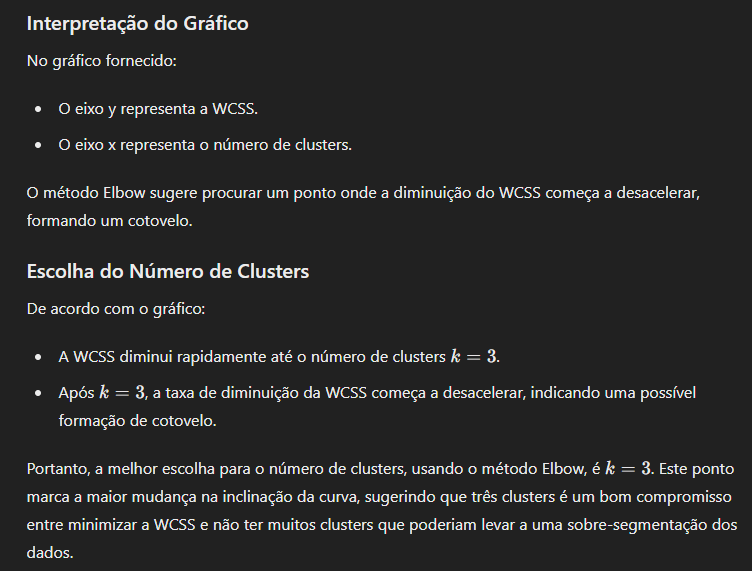

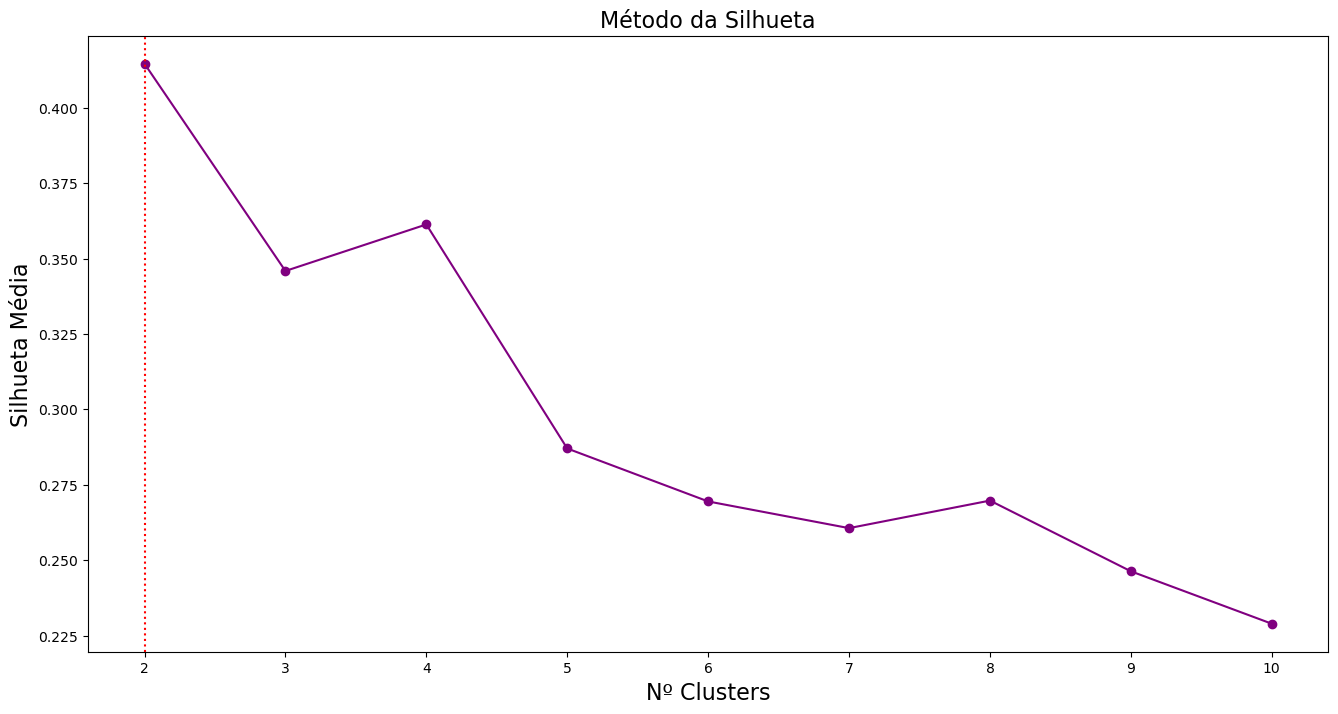

In [19]:
#%% Identificação da quantidade de clusters (Método da Silhueta)

silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(paises_pad)
    silhueta.append(silhouette_score(paises_pad, kmeansSil.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()

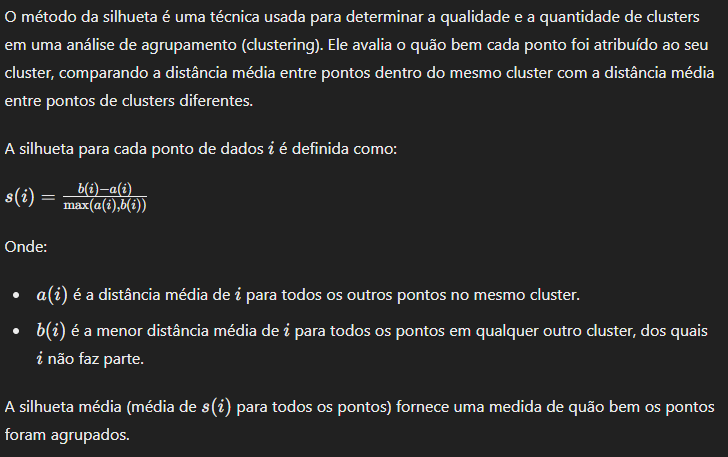

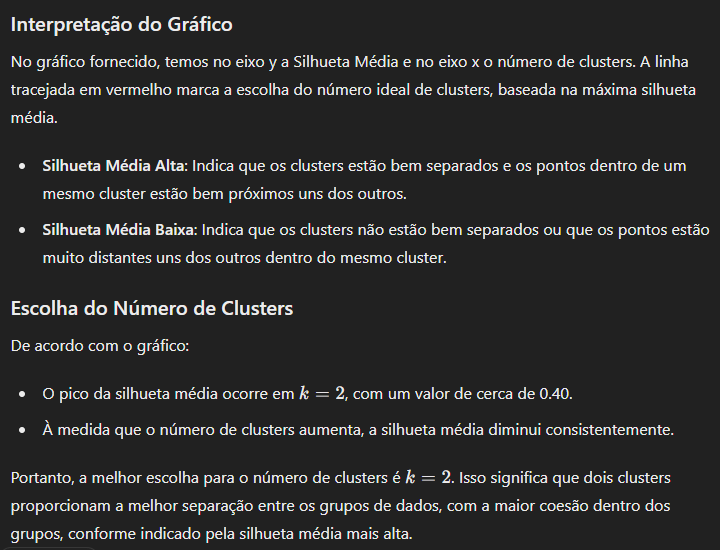

In [80]:
### FOI ESCOLHIDO 5 CLUSTERS #####

# Gerando a variável com a indicação do cluster no dataset

cluster_comp = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(paises_pad)
dados_paises['cluster_complete'] = indica_cluster_comp
paises_pad['cluster_complete'] = indica_cluster_comp
dados_paises['cluster_complete'] = dados_paises['cluster_complete'].astype('category')
paises_pad['cluster_complete'] = paises_pad['cluster_complete'].astype('category')

display(dados_paises.head(10))
display(paises_pad.head(10))

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_complete
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_complete
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143,4
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167,1
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980,1
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720,4
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692,1
5,-0.589405,-0.810191,0.467560,-1.275950,0.080678,1.240993,0.589701,-0.381785,-0.145354,1
6,-0.500139,-0.740879,-0.879444,-0.065685,-0.541791,-0.001119,0.308586,-0.830971,-0.531634,1
7,-0.829927,-0.777359,0.696915,-1.073550,1.258182,-0.626432,1.286865,-0.672435,2.124310,0
8,-0.842325,0.371772,1.523320,0.037580,1.351552,-0.653583,1.118196,-0.996114,1.851513,0
9,0.023059,0.481213,-0.340642,-1.081812,-0.059378,0.569325,-0.163686,-0.679041,-0.388688,1


In [67]:
#%% Análise de variância de um fator (ANOVA)

# Interpretação do output:

## cluster_kmeans MS: indica a variabilidade entre grupos
## Within MS: indica a variabilidade dentro dos grupos
## F: estatística de teste (cluster_kmeans MS / Within MS)
## p-unc: p-valor da estatística F
## se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

# child_mort
pg.anova(dv='child_mort', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

# exports
pg.anova(dv='exports', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

# imports
pg.anova(dv='imports', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

# health
pg.anova(dv='health', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

# income
pg.anova(dv='income', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

# inflation
pg.anova(dv='inflation', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

# life_expec
pg.anova(dv='life_expec', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

# total_fer
pg.anova(dv='total_fer', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

# gdpp
pg.anova(dv='gdpp', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

## A variável mais discriminante contém a maior estatística F (e significativa)
## O valor da estatística F é sensível ao tamanho da amostra

,0,1
Source,cluster_complete,Within
SS,113.930595,52.069405
DF,4,162
MS,28.482649,0.321416
F,88.616129,NaN
p-unc,0.0,NaN
np2,0.686329,NaN


Para child_mort (ok): apresenta média estatisticamente diferente dos demais;
Para exports (ok): apresenta média estatisticamente diferente dos demais;
Para health (ok): apresenta média estatisticamente diferente dos demais;
Para imports (ok): apresenta média estatisticamente diferente dos demais;
Para income (ok): apresenta média estatisticamente diferente dos demais;
Para inflation (ok): apresenta média estatisticamente diferente dos demais;
Para life_expec (ok): apresenta média estatisticamente diferente dos demais;
Para total_fer (ok): apresenta média estatisticamente diferente dos demais;
Para gdpp (ok): apresenta média estatisticamente diferente dos demais;


,categoria,teste_f,teste_pvalue
7,total_fer,88.62,0.0
6,life_expec,82.75,0.0
8,gdpp,74.11,0.0
0,child_mort,62.48,0.0
5,inflation,46.43,0.0
4,income,42.06,0.0
1,exports,37.64,0.0
3,imports,28.83,0.0
2,health,7.20,0.0


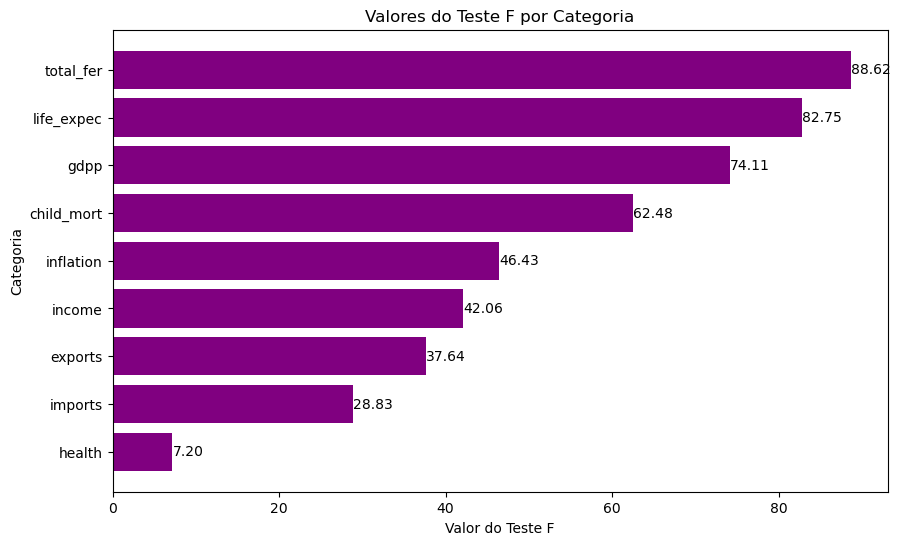

In [79]:
### loop para o teste F de cada categoria ###

import matplotlib.pyplot as plt

categoria = []
teste_f = []
teste_pvalue = []

teste_paises_pad = paises_pad.drop(['cluster_complete'], axis = 1)

for i in teste_paises_pad.columns:
    # Executa ANOVA para a coluna atual
    teste = pg.anova(dv=i,
                    between='cluster_complete',
                    data=paises_pad, detailed=True)
    categoria.append(i)
    teste_f.append(round(teste.iloc[0,4], 2))
    teste_pvalue.append(round(teste.iloc[0,5], 2))
    if  teste.iloc[0,5] < 0.05:
        print(f'Para {i} (ok): apresenta média estatisticamente diferente dos demais;')
    else:
        print(f'Para {i} (nok): NÃO apresenta média estatisticamente diferente dos demais;')

df_teste = {'categoria': categoria,
            'teste_f': teste_f,
            'teste_pvalue': teste_pvalue,
            }
    
df_teste = pd.DataFrame(df_teste)   

df_teste = df_teste.sort_values(by = 'teste_f', ascending = False)

display(df_teste)

# Criar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(df_teste['categoria'], df_teste['teste_f'], color='purple')
plt.xlabel('Valor do Teste F')
plt.ylabel('Categoria')
plt.title('Valores do Teste F por Categoria')
plt.gca().invert_yaxis()  # Inverte o eixo y para ter a maior barra no topo

# Adicionar rótulos de valor em cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left')

plt.show()

In [75]:
#%% Gráfico 3D dos clusters

# Perspectiva 1
fig = px.scatter_3d(dados_paises, 
                    x='total_fer', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.show()

# Perspectiva 2
fig = px.scatter_3d(dados_paises, 
                    x='gdpp', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.show()

In [77]:
#%% Identificação das características dos clusters

# Agrupando o banco de dados

analise_paises = dados_paises.drop(columns=['country']).groupby(by=['cluster_complete'])

# Estatísticas descritivas por grupo

tab_medias_grupo = analise_paises.mean().T
tab_desc_grupo = analise_paises.describe().T

display(tab_medias_grupo)

cluster_complete,0,1,2,3,4
child_mort,4.500000,18.874737,4.133333,130.00,81.344444
exports,39.392857,42.718726,176.000000,25.30,31.520741
health,10.292143,6.410842,6.793333,5.07,6.660185
imports,33.207143,44.488062,156.666667,17.40,49.111111
income,49721.428571,18582.000000,64033.333333,5150.00,3787.462963
inflation,2.093571,7.124495,2.468000,104.00,8.926389
life_expec,80.892857,74.478947,81.433333,60.50,60.555556
total_fer,1.800000,2.142000,1.380000,5.84,4.697037
gdpp,53742.857143,11941.473684,57566.666667,2330.00,1910.074074


In [78]:
display(tab_desc_grupo)

cluster_complete             0             1              2       3  \
child_mort count     14.000000     95.000000       3.000000     1.0   
           mean       4.500000     18.874737       4.133333   130.0   
           std        1.781529     16.376170       2.309401     NaN   
           min        2.600000      3.200000       2.800000   130.0   
           25%        3.200000      7.700000       2.800000   130.0   
...                        ...           ...            ...     ...   
gdpp       min    40600.000000    482.000000   21100.000000  2330.0   
           25%    44925.000000   3885.000000   33850.000000  2330.0   
           50%    47900.000000   8000.000000   46600.000000  2330.0   
           75%    56525.000000  14050.000000   75800.000000  2330.0   
           max    87800.000000  50300.000000  105000.000000  2330.0   

cluster_complete             4  
child_mort count     54.000000  
           mean      81.344444  
           std       39.074325  
           min       17.400000  
           25%       54.275000  
...                        ...  
gdpp       min      231.000000  
           25%      566.000000  
           50%      983.500000  
           75%     2600.000000  
           max    17100.000000  

[72 rows x 5 columns]